# Optimization

Let me use the **House Pricing** dataset, where contains a lot of information about the houses being sold and the given dataset allows to produce the price of the house. 


**NOTE: I will try to write an optimal code, avoiding cycles and use `numpy` instead!

Firstly, let me import basic libraries (`numpy` ([docs](https://numpy.org/)) for matrix operations and `pandas` ([docs](https://pandas.pydata.org/)) for convinient dataset workaround):

In [135]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

### Task 1. Reading dataset

In [136]:
datX=np.load('x_train.npy')
datY=np.log(np.load('y_train.npy'))
datX=pd.DataFrame(datX, columns=datX.dtype.names)
print(datX.shape, datY.shape)
datX.head(3)

(15000, 16) (15000,)


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2014-09-16,5.0,3.25,3710,34200,2.0,False,3,8,2510,1200,1986,0,98074,47.610100,-122.046997
1,2014-11-18,3.0,1.75,2820,8879,1.0,False,5,7,1540,1280,1920,1957,98146,47.509399,-122.375999
2,2014-11-10,3.0,1.00,1240,239144,1.0,False,3,6,1240,0,1921,1992,98038,47.430302,-122.045998


Okay, we manage to load the data (you can read more about the `load` [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html). But it is not a necessity). I'm going to use linear models to work with it, but firstly we need to come up with idea what features should we include in the model at all (which feature the price is lineary dependent on).

In order to do it let us plot every feature vs the price. Firstly, we import nice plotting modules:

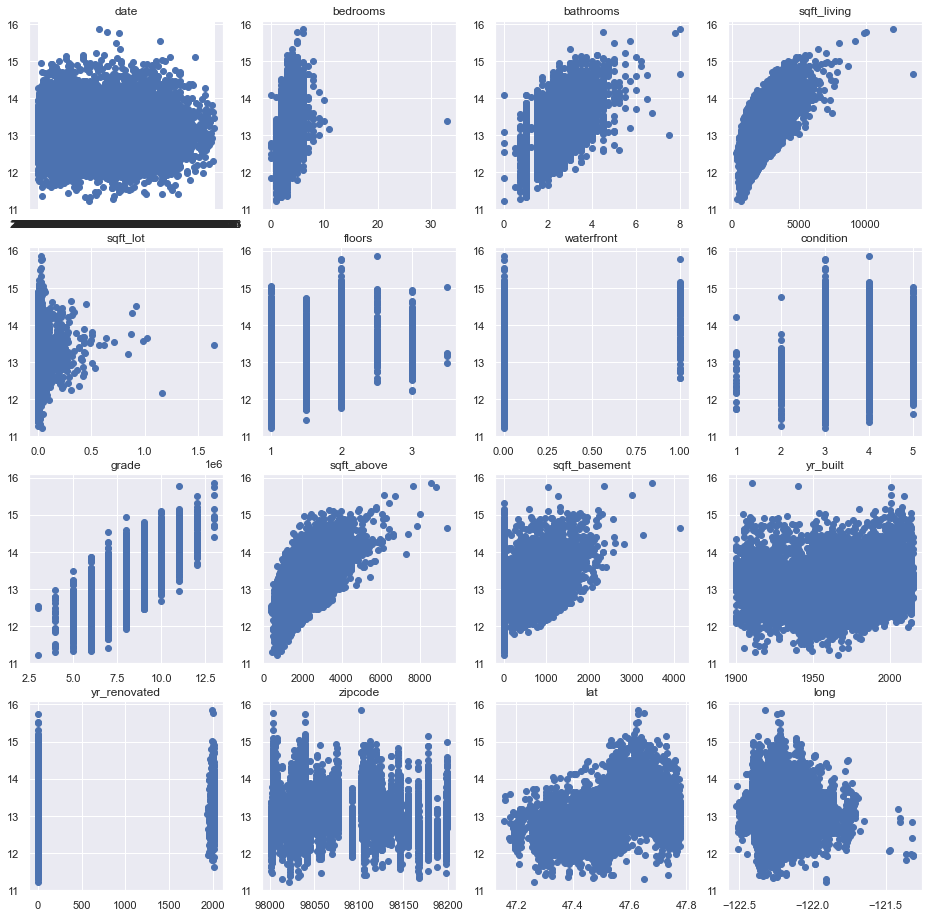

In [137]:
f, ax=plt.subplots(4, 4, figsize=(16,16))

for i, name in enumerate(datX.columns):
    ax[i//4][i%4].scatter(datX[name], datY)
    ax[i//4][i%4].set_title(name)

Let us say, that we choose to work the following set of features:
+ `bedrooms`
+ `bathrooms`
+ `sqft_living`
+ `floors`
+ `condition`
+ `grade`
+ `sqft_above`
+ `sqft_basement`
+ `long`
+ `lat`

Clear the dataset from all the other features and create:
1. matrix $X$, all elements should be real numbers
2. number $N$ -- number of considered houses
3. number $m$ -- number of new features

**Hint**: it is easier to clean columns from dataset (you should look [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) for insipration) and the get a matrix with `.values`

In [138]:
df = datX[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition',
 'grade', 'sqft_above', 'sqft_basement', 'lat', 'long']]
print(df.shape)
df.info()

(15000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       15000 non-null  float32
 1   bathrooms      15000 non-null  float32
 2   sqft_living    15000 non-null  int32  
 3   floors         15000 non-null  float32
 4   condition      15000 non-null  int32  
 5   grade          15000 non-null  int32  
 6   sqft_above     15000 non-null  int32  
 7   sqft_basement  15000 non-null  int32  
 8   lat            15000 non-null  float32
 9   long           15000 non-null  float32
dtypes: float32(5), int32(5)
memory usage: 586.1 KB


In [139]:
X, N, m = df.values, df.shape[0], df.shape[1]
print(X.shape, N, m, sep='\n')

(15000, 10)
15000
10


In [140]:
X = np.concatenate((np.ones((N, 1)), X), axis=1)
y = datY.reshape(-1, 1)
w_k = np.random.rand(X.shape[1], 1)
print(X.shape, y.shape, w_k.shape)

(15000, 11) (15000, 1) (11, 1)


Consider that we are interested in the loss of the model:

+ Assume we have input data that is denoted as $\vec{x}_1, \vec{x}_2, \ldots, \vec{x}_N$
+ House prices for this input data are known $y_1, y_2, \ldots, y_N$

I propose a **simple linear model** for this task:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

As a loss function we will use the mean squared error (**MSE**):

$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N (y_i-\hat{y}_i)^2
$$

### Task 2. Compute analytically the $Loss(\vec{w})$ function


_Hint_: to get nice $w_0$ coefficient it is convinient to add to the `X` matrix the column of 1 with `np.concatenate` [documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html)

In [141]:
def loss(w, X, y):
    return np.mean((X.dot(w) - y)**2)

loss(w_k, X, y)

10285375.482072886

### Task 3. Compute analyticaly the gradient of the $Loss(\vec{w})$ 
Please, enter your answer in the cell below (it should be a `markdown` cell). You can initially specify each partial derivative $\frac{\partial Loss}{\partial w_i}$, but **your final answer must consists of $\nabla Loss$ altogether using matrix operations**.

$$ \frac{dLoss}{dw_j} = \frac{2}{N} \sum_{i=1}^{N}x_{ij}(<w, x_i> - y_i), $$
$$ where \ <w, x_i> — Scalar \  multiplication $$
$$ or \ using \ matrix \ operations $$
$$ \nabla Loss = \frac{2}{N}(X_t(y - Xw)), $$
$$ where \ X_t - X \ transposed $$

### Task 4. Write a function to compute the gradient of the Loss function in the given point

In [142]:
def grad(w_k, X, y):
    return (2/N) * X.T.dot((X.dot(w_k) - y))   

### Task 5. Write gradient descent
Now it is time to formulate the gradient descent! As you remeember, the idea here is that:
$$
\vec{w}^{k+1}=\vec{w}^{k}-\alpha_k\cdot \nabla Loss(\vec{w}^{k})
$$
We propose that you use constant $\alpha_k=\alpha$. Assume that the method should stop in two cases:
+ if the number of iterations is to high (`maxiter`)
+ if the length of the gradient is low enough (<`eps`) to call an extremum

In [143]:
def gradDescent(w_init, alpha, X, y, maxiter=10000, eps=1e-2):
    losses = []
    weights = [w_init]
    
    curiter = 0
    w_k = weights[-1]
    
    while (curiter < maxiter):
        if np.linalg.norm(grad(w_k, X, y)) < eps:
            break
            
        w_k = w_k - (alpha * grad(w_k, X, y))
        lossValue_k = loss(w_k, X, y)
        
        weights.append(w_k)
        losses.append(lossValue_k)
        curiter += 1
        
    return weights, losses

Experiment with several alphas and several intial values of weights. To illustrate, provide graphs for the Loss function over iterations in each case (and, optionally, the distance between weigths from one iteration to the next):

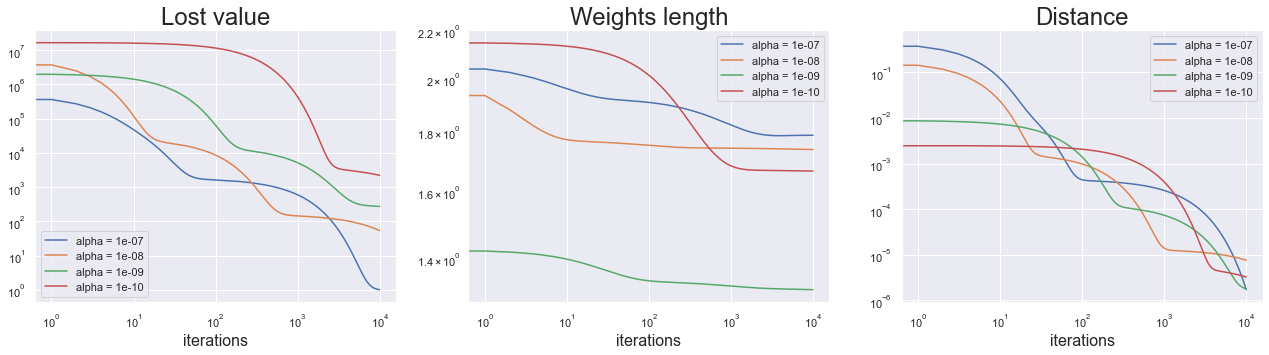

In [144]:
fig, ax = plt.subplots(1, 3, figsize=(22, 5))

for alpha in [1e-7, 1e-8, 1e-9, 1e-10]:
    w_k = np.random.rand(X.shape[1], 1)
    weights, losses = gradDescent(w_k, alpha, X, y, maxiter=10000, eps=1e-2)
    
    ax[0].loglog(losses, label=f'alpha = {alpha}')
    ax[0].set_title('Lost value', fontsize=24)
    ax[0].set_xlabel('iterations', fontsize=16)
    ax[0].legend()
    
    ax[1].loglog([np.linalg.norm(x) for x in weights], label=f'alpha = {alpha}')
    ax[1].set_title('Weights length', fontsize=24)
    ax[1].set_xlabel('iterations', fontsize=16)
    ax[1].legend()
    
    distance = [np.linalg.norm(x) for x in (np.array(weights[:-1]) - np.array(weights[1:]))]
    ax[2].loglog(distance, label=f'alpha = {alpha}')
    ax[2].set_title('Distance', fontsize=24)
    ax[2].set_xlabel('iterations', fontsize=16)
    ax[2].legend()

Let us check the adequacy of the model we created.

Choose several (no less then five) houses (inputs in your `X` matrix) and calculte predicted prices by:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

In [145]:
w_k = np.random.rand(X.shape[1], 1)
alpha = 1e-7
maxiter = 20000
eps = 1e-2

weights_test, _ = gradDescent(w_k, alpha, X, y, maxiter, eps)

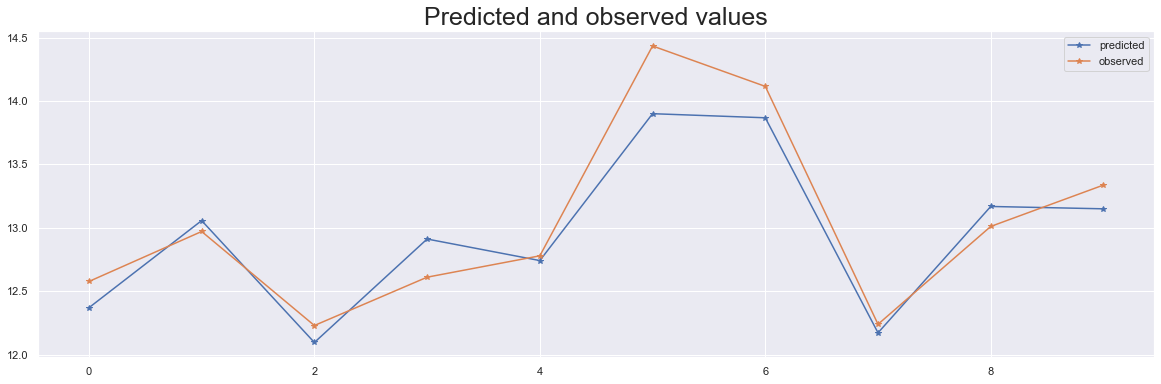

In [146]:
pred, real = list(), list()
for _ in range(10):
    idx = np.random.randint(X.shape[0])
    pred.append(X[idx].dot(weights_test[-1]))
    real.append(y[idx])

fig = plt.figure(figsize=(20, 6))
plt.plot(pred, '*-', label='predicted')
plt.plot(real, '*-', label='observed')
plt.title('Predicted and observed values', fontsize=25)
plt.legend();

### Task 6. Data transformation

As you have probably already seen above, the convergence of the gradient descent is not ideal for our data. One way to overcome this is to transform the input data so that:
+ the **average** of each feature should be $0$
+ the **standard deviation** of each feature should be $1$

In such a way levels of the loss function would be close to circles; thus one should hope to faster convergence.

Implement such normalisation:

In [147]:
X[:, 1:] = (X[:, 1:] - X[:, 1:].mean(axis=0)) / X[:, 1:].std(axis=0)
X[:, 3].std(), X[:, 7].mean()

(0.9999999999999999, 1.0113391605652093e-16)

In [148]:
X[:, 2].mean(), X[:, 5].std()

(-1.4779288903810083e-16, 1.0)

### Task 7. And again

Repeat gradient descent experiments for different $\alpha$s, now with transformed data.

+ Run at least two experiments with different $\alpha$
+ At least two experiments should be convergent

1. Provide `loss` plots for those experiments (on the same graph). (**1 point**)
2. Are optimized weights the same? Illustrate it (plot it or show differences in other way)

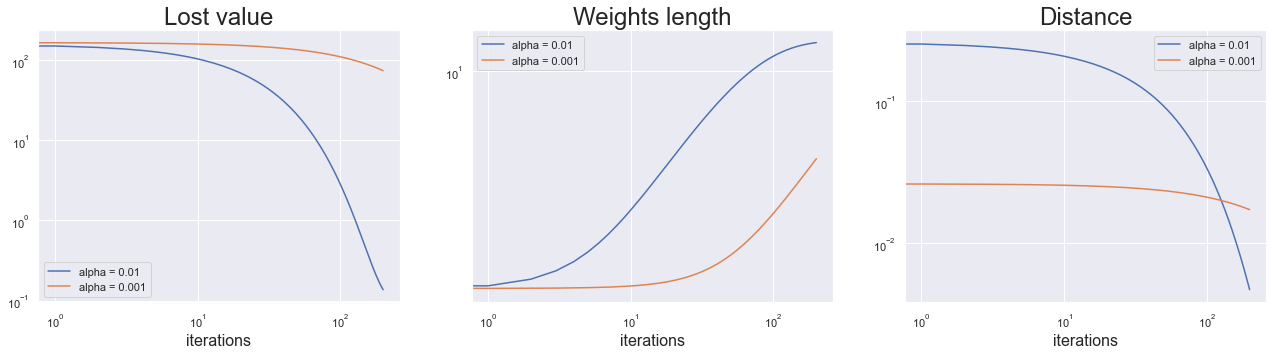

In [149]:
fig, ax = plt.subplots(1, 3, figsize=(22, 5))

for alpha in [1e-2, 1e-3]:
    w_k = np.random.rand(X.shape[1], 1)
    weights, losses = gradDescent(w_k, alpha, X, y, maxiter=200, eps=1e-2)
    
    ax[0].loglog(losses, label=f'alpha = {alpha}')
    ax[0].set_title('Lost value', fontsize=24)
    ax[0].set_xlabel('iterations', fontsize=16)
    ax[0].legend()
    
    ax[1].loglog([np.linalg.norm(x) for x in weights], label=f'alpha = {alpha}')
    ax[1].set_title('Weights length', fontsize=24)
    ax[1].set_xlabel('iterations', fontsize=16)
    ax[1].legend()
    
    distance = [np.linalg.norm(x) for x in (np.array(weights[:-1]) - np.array(weights[1:]))]
    ax[2].loglog(distance, label=f'alpha = {alpha}')
    ax[2].set_title('Distance', fontsize=24)
    ax[2].set_xlabel('iterations', fontsize=16)
    ax[2].legend()

In [150]:
w_k = np.random.rand(X.shape[1], 1)
alpha = 1e-2
maxiter = 200
eps = 1e-2

weights_test, _ = gradDescent(w_k, alpha, X, y, maxiter, eps)

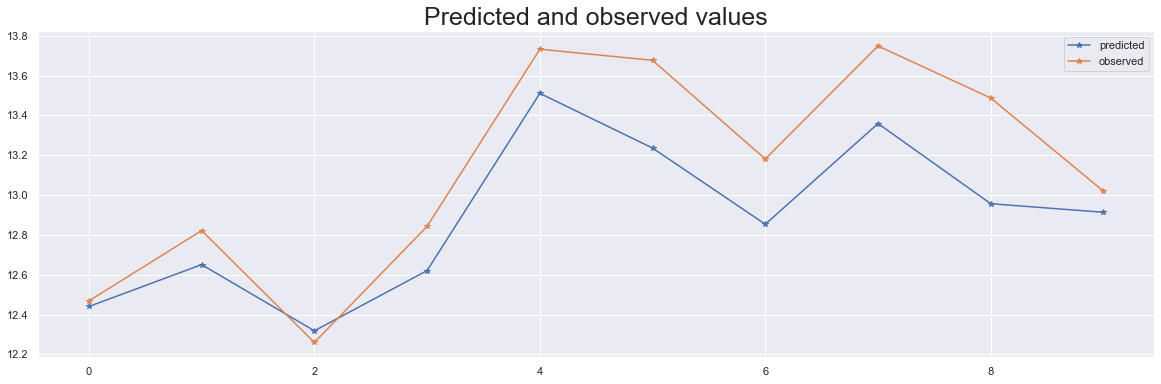

In [151]:
pred, real = list(), list()
for _ in range(10):
    idx = np.random.randint(X.shape[0])
    pred.append(X[idx].dot(weights_test[-1]))
    real.append(y[idx])

fig = plt.figure(figsize=(20, 6))
plt.plot(pred, '*-', label='predicted')
plt.plot(real, '*-', label='observed')
plt.title('Predicted and observed values', fontsize=25)
plt.legend();

### Task 8. Better pay twice

Sometimes it is essential to alter the loss function and make it assymetric. Normally, it is motivated by the task itself. For instance, in our case assume that one uses our prediction to bid for an apartment: hence if our $\hat{y}>y$ then we will overpay, but if $\hat{y}<y$ we will not get an apartment, but also won't lose any money. 

Let us introduce our new function:
$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N \begin{cases} a(y_i-\hat{y}_i)^2, \quad y_i>\hat{y}_i \\ b(y_i-\hat{y}_i)^2, \quad y_i\le\hat{y}_i \end{cases}
$$

Implement new loss and new gradient:

In [152]:
def new_loss(w_k, X, y, a, b):
    
    mask = y <= X.dot(w_k)
    case_a = (X.dot(w_k) - y)**2 * a
    case_b = (X.dot(w_k) - y)**2 * b
    
    case_a[mask] = case_b[mask]
    
    return case_a.mean()

In [153]:
def new_grad(w_k, X, y, a, b):
    mask = y <= X.dot(w_k)
    case_a = (X.dot(w_k) - y) * a
    case_b = (X.dot(w_k) - y) * b
    
    case_a[mask] = case_b[mask]
    
    return (2/N) * X.T.dot(case_a)

Now let us experiment with new functions:

1. Assume your data was normalised (otherwise repeat **Task 6**)
2. Select at least two pairs of $(a,b)$ parameters such that $a_1/b_1>1$ and $a_2/b_2<1$
3. Run **gradient descent** with new function and given parameters
4. Make a `loss` plot for each expriment (please, provide legend!)
5. Check whether you've got coinciding weights and _illustrate_ it

You may also alter $\alpha$ and provide more experiments on composite relation between $a/b$ and $\alpha$ values (_optional_).

In [154]:
def new_gradDescent(w_init, alpha, X, y, a, b, maxiter=100, eps=1e-2):
    losses = []
    weights = [w_init]
    
    curiter = 0
    w_k = weights[-1]
    
    while (curiter < maxiter):
        if np.linalg.norm(new_grad(w_k, X, y, a, b)) < eps:
            break
            
        w_k = w_k - (alpha * new_grad(w_k, X, y, a, b))
        lossValue_k = new_loss(w_k, X, y, a, b)
        
        weights.append(w_k)
        losses.append(lossValue_k)
        curiter += 1
        
    return weights, losses

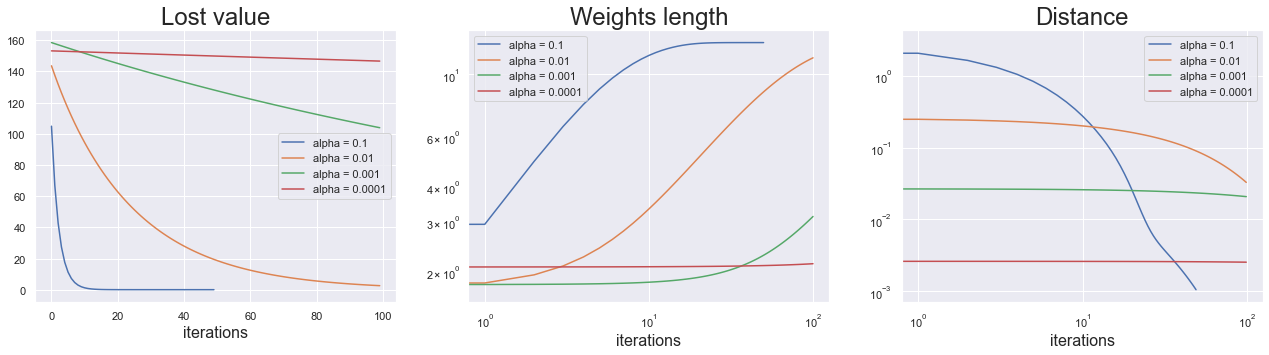

In [163]:
fig, ax = plt.subplots(1, 3, figsize=(22, 5))

for alpha in [1e-1, 1e-2, 1e-3, 1e-4]:
    w_k = np.random.rand(X.shape[1], 1)
    weights, losses = new_gradDescent(w_k, alpha, X, y, 1, 2, maxiter=100, eps=1e-2)
    
    ax[0].plot(losses, label=f'alpha = {alpha}')
    ax[0].set_title('Lost value', fontsize=24)
    ax[0].set_xlabel('iterations', fontsize=16)
    ax[0].legend()
    
    ax[1].loglog([np.linalg.norm(x) for x in weights], label=f'alpha = {alpha}')
    ax[1].set_title('Weights length', fontsize=24)
    ax[1].set_xlabel('iterations', fontsize=16)
    ax[1].legend()
    
    distance = [np.linalg.norm(x) for x in (np.array(weights[:-1]) - np.array(weights[1:]))]
    ax[2].loglog(distance, label=f'alpha = {alpha}')
    ax[2].set_title('Distance', fontsize=24)
    ax[2].set_xlabel('iterations', fontsize=16)
    ax[2].legend()

In [164]:
w_k = np.random.rand(X.shape[1], 1)
alpha, maxiter, eps, a, b = 1e-1, 100, 1e-2, 1, 2

weights_test, _ = new_gradDescent(w_k, alpha, X, y, a, b, maxiter, eps)

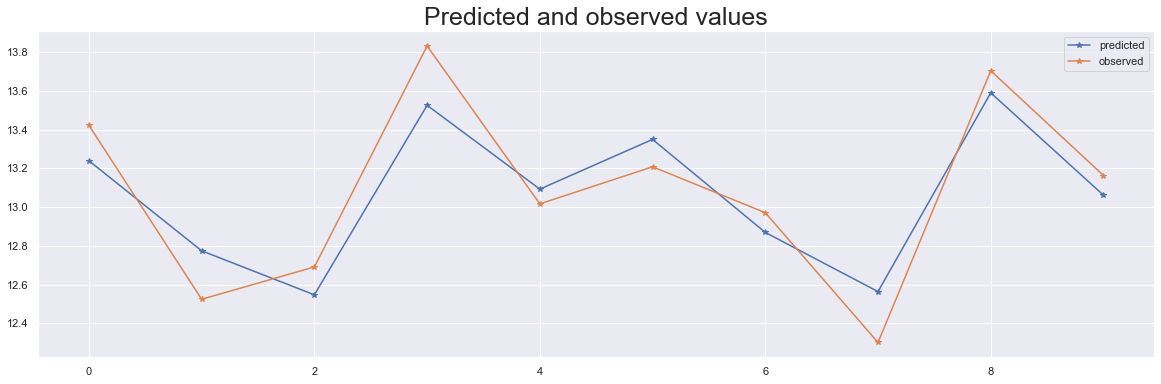

In [165]:
pred, real = list(), list()
for _ in range(10):
    idx = np.random.randint(X.shape[0])
    pred.append(X[idx].dot(weights_test[-1]))
    real.append(y[idx])

fig = plt.figure(figsize=(20, 6))
plt.plot(pred, '*-', label='predicted')
plt.plot(real, '*-', label='observed')
plt.title('Predicted and observed values', fontsize=25)
plt.legend();

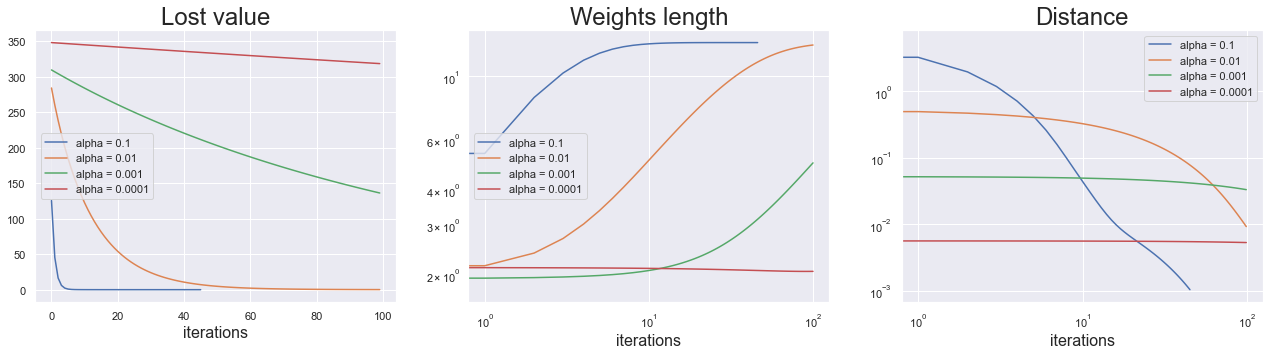

In [166]:
fig, ax = plt.subplots(1, 3, figsize=(22, 5))

for alpha in [1e-1, 1e-2, 1e-3, 1e-4]:
    w_k = np.random.rand(X.shape[1], 1)
    weights, losses = new_gradDescent(w_k, alpha, X, y, 2, 1, maxiter=100, eps=1e-2)
    
    ax[0].plot(losses, label=f'alpha = {alpha}')
    ax[0].set_title('Lost value', fontsize=24)
    ax[0].set_xlabel('iterations', fontsize=16)
    ax[0].legend()
    
    ax[1].loglog([np.linalg.norm(x) for x in weights], label=f'alpha = {alpha}')
    ax[1].set_title('Weights length', fontsize=24)
    ax[1].set_xlabel('iterations', fontsize=16)
    ax[1].legend()
    
    distance = [np.linalg.norm(x) for x in (np.array(weights[:-1]) - np.array(weights[1:]))]
    ax[2].loglog(distance, label=f'alpha = {alpha}')
    ax[2].set_title('Distance', fontsize=24)
    ax[2].set_xlabel('iterations', fontsize=16)
    ax[2].legend()

In [167]:
w_k = np.random.rand(X.shape[1], 1)
alpha, maxiter, eps, a, b = 1e-1, 100, 1e-2, 2, 1

weights_test, _ = new_gradDescent(w_k, alpha, X, y, a, b, maxiter, eps)

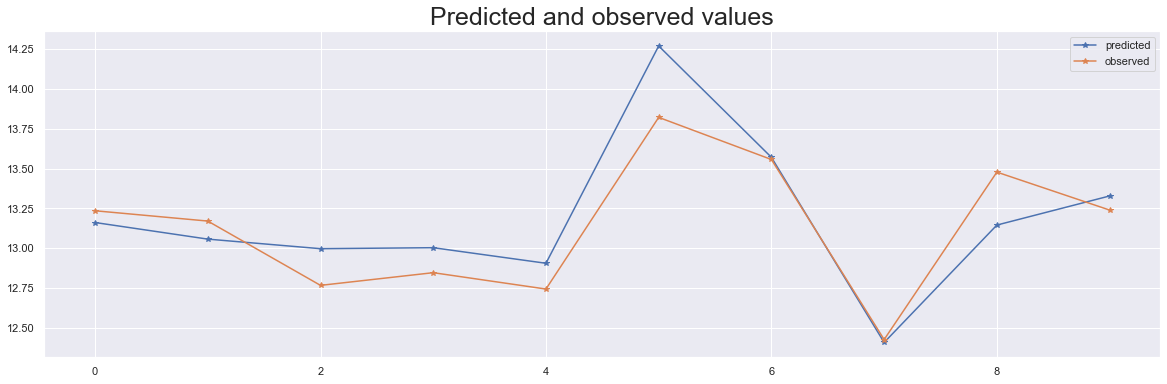

In [168]:
pred, real = list(), list()
for _ in range(10):
    idx = np.random.randint(X.shape[0])
    pred.append(X[idx].dot(weights_test[-1]))
    real.append(y[idx])

fig = plt.figure(figsize=(20, 6))
plt.plot(pred, '*-', label='predicted')
plt.plot(real, '*-', label='observed')
plt.title('Predicted and observed values', fontsize=25)
plt.legend();